In [9]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn
import os
import seaborn as sns
os.getcwd()
#print('Python: {}'.format(sys.version))
#print('scipy: {}'.format(scipy.__version__))
#print('numpy: {}'.format(numpy.__version__))
#print('matplotlib: {}'.format(matplotlib.__version__))
#print('pandas: {}'.format(pandas.__version__))
#print('sklearn: {}'.format(sklearn.__version__))



'/content'

In [2]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)
df.head(11)


,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [11]:
df.isnull().sum() #no null values found

id                        0
clump_thickness           0
uniform_cell_size         0
uniform_cell_shape        0
marginal_adhesion         0
single_epithelial_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [12]:
df.replace('?',-99999, inplace=True)
df.drop(['id'], axis=1, inplace=True) #dropping the ID column
print(df.axes)

[RangeIndex(start=0, stop=699, step=1), Index(['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


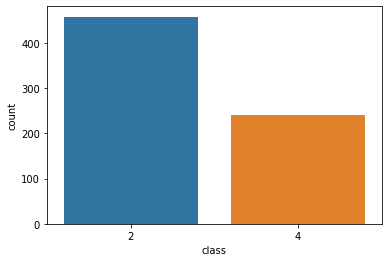

In [10]:
df['class'].value_counts() #We have two classes 2 and 4. Here 2 refers to non-malign cells and 4 refers to malign cells
sns.countplot(df['class']) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


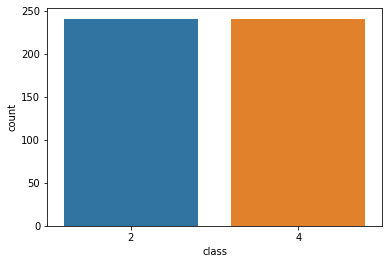

In [17]:
#Now we have an imabalanced dataset. The dataset have to be balanced for the model to perform better

# Put all the fraud class in a separate dataset.
malign_df = df.loc[df['class'] == 4] 

#Randomly select 492 observations from the non-fraud (majority class)
non_malign_df = df.loc[df['class'] == 2].sample(n=malign_df.shape[0],random_state=42)

# Concatenate both dataframes again
final_df = pd.concat([malign_df, non_malign_df])

## Now we have a balanced dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


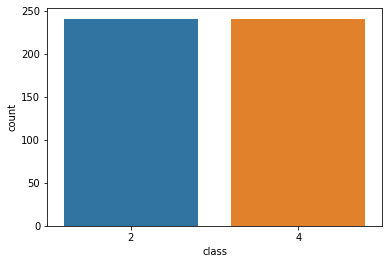

In [20]:
sns.countplot(final_df['class'])

In [22]:
# Describe the dataset
print(final_df.describe())

       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       482.000000         482.000000          482.000000   
mean          4.989627           3.923237            3.985477   
std           3.007595           3.331997            3.228929   
min           1.000000           1.000000            1.000000   
25%           3.000000           1.000000            1.000000   
50%           5.000000           3.000000            3.000000   
75%           8.000000           6.000000            7.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         482.000000              482.000000       482.000000   
mean            3.404564                3.717842         4.080913   
std             3.162314                2.456112         2.597714   
min             1.000000                1.000000         1.000000   
25%             1.000000                2.000000         2.000000   


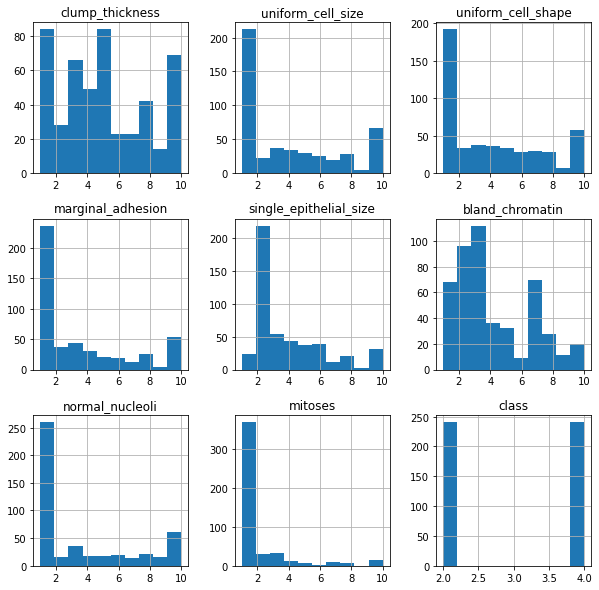

In [23]:
final_df.hist(figsize = (10, 10))
plt.show()

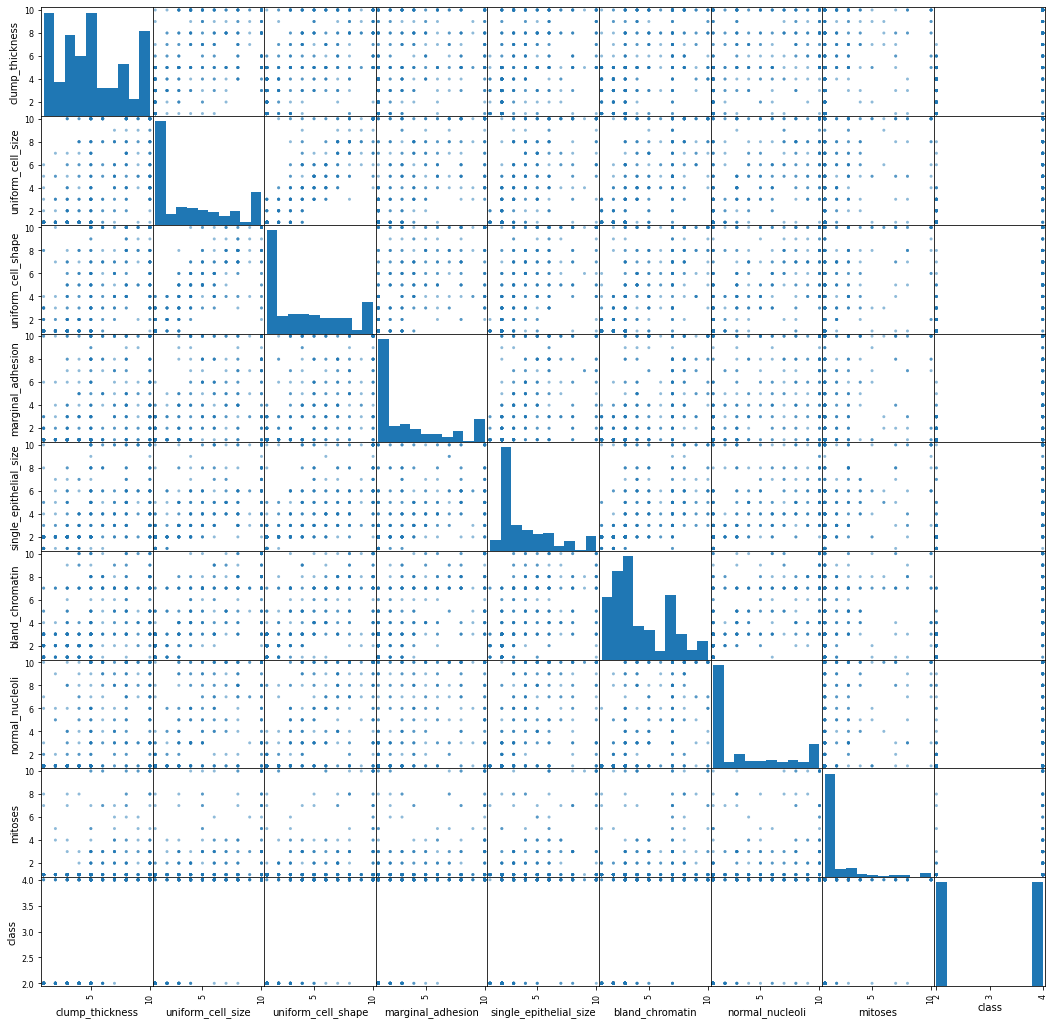

In [24]:
scatter_matrix(final_df, figsize = (18,18))
plt.show()

In [25]:
X = np.array(final_df.drop(['class'], 1)) #depended variables
y = np.array(final_df['class']) #predictor variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [26]:
seed = 42
scoring = 'accuracy'

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC(kernel='linear')))
models.append(('Logistic Regression',LogisticRegression()))
results = {}
names = []

In [40]:
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_train)
    accuracy=accuracy_score(y_train, predictions)*100
    results[name]=accuracy
    print(name)
    print("{0:0.2f}%".format(accuracy))
    print(classification_report(y_train, predictions))

KNN
98.44%
              precision    recall  f1-score   support

           2       0.98      0.98      0.98       196
           4       0.98      0.98      0.98       189

    accuracy                           0.98       385
   macro avg       0.98      0.98      0.98       385
weighted avg       0.98      0.98      0.98       385

SVM
96.10%
              precision    recall  f1-score   support

           2       0.99      0.93      0.96       196
           4       0.94      0.99      0.96       189

    accuracy                           0.96       385
   macro avg       0.96      0.96      0.96       385
weighted avg       0.96      0.96      0.96       385

Logistic Regression
96.62%
              precision    recall  f1-score   support

           2       0.96      0.97      0.97       196
           4       0.97      0.96      0.97       189

    accuracy                           0.97       385
   macro avg       0.97      0.97      0.97       385
weighted avg       0.97  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [42]:
results

{'KNN': 98.44155844155844,
 'Logistic Regression': 96.62337662337663,
 'SVM': 96.1038961038961}

In [46]:
results_df=pd.DataFrame(list(results.items()),columns=['Model','Accuracy']).sort_values(by='Accuracy',ascending=False)
results_df

,Model,Accuracy
0,KNN,98.441558
2,Logistic Regression,96.623377
1,SVM,96.103896


##Note this is a very simple model and a very small dataset is considered. This notebook is created to learn and implement the basics of data scienct project. In real life datasets achieve these high accracies are very difficult and needs lot of data preprocessing and hyperparameter tuning.

Thank you....